In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will use a Self-Organizing Map to identify fraudulent accounts from a dataset of bank account features (with unknown meaning). There are 14 features, named from A1 to A14, and a Class feature saying if each account was approved or not. We need to separate accounts into two clusters, with an outliers cluster being identified as fraudulent accounts.

In [3]:
# Load dataset
df = pd.read_csv('/home/gui/Downloads/udemy_deep_learning AZ/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')
df.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [8]:
# Take the training dataset (just separate the Class feature, there is no target feature here)

X = df.iloc[:,:-1].values
X[:5]

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, 1.1460000e+01,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.5850000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, 1.7500000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5687688e+07, 0.0000000e+00, 2.1670000e+01, 1.1500000e+01,
        1.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00,

In [9]:
Y = df.iloc[:,-1].values
Y[:5]

array([0, 0, 0, 1, 1])

In [12]:
# Rescale X using MinMax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[:5]

array([[0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ],
       [0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.08      , 0.        ],
       [0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ],
       [0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
        0.30769231, 0.25      , 0.        , 1.        , 1.        ,
        0.1641791 , 1.        , 0.5       , 0.        , 0.        ],
       [0.60079526, 1.        , 0.09654135, 0.29178571, 0.5       ,
        0.38461538, 0.375     , 0.06877193, 1.        , 1.        ,
        0.20895522, 0.        , 0.5       , 

In [17]:
# Import MiniSom. We will built the SOM using it, not from scratch

from minisom import MiniSom

som = MiniSom(10,10,X.shape[1]) # 10x10 som is sufficient, since X is not that big. other parameters are kept default

In [73]:
# Train the SOM on X

som.random_weights_init(X)
som.train_random(X, num_iteration=100)

In [20]:
# Now, we visualize the SOM
from pylab import bone, pcolor, colorbar, plot, show



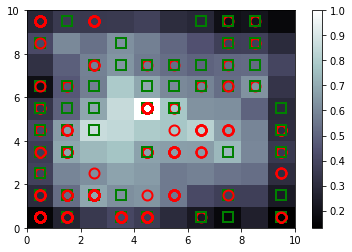

In [74]:
bone()

# We pair colors with medium interneuron distances, farthest neurons are winning nodes for outliers
pcolor(som.distance_map().T)
colorbar()

# Now, we mark the winning nodes corresponding to accepted/rejected accounts using Y
markers = ['o','s'] # Circles for rejected and squares for accepted
colors = ['r','g'] # Red for rejected and green for accepted
for i,x in enumerate(X): # Take the index and account from X
    w = som.winner(x) # Take coordinates of the winner node
    # We plot w+0.5 to centralize the markers within the node squares
    plot(w[0]+0.5,w[1]+0.5, markers[Y[i]], markeredgecolor=colors[Y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2)

show()

We see here that fraudulent accounts have white winning nodes and there is only one white node associated with accounts, actually. We have both accepted and rejected accounts in that white node.

In [75]:
mapping = som.win_map(X) # A dict with winner nodes coordinates and the accounts associated with them.

In [76]:
len(mapping[(4,5)]) # Let's see how many accounts are at the white node, at (4,5)

43

In [77]:
frauds = mapping[(4,5)]
frauds = scaler.inverse_transform(frauds)

This is the list of potential fraudulent IDs, given by the SOM:

In [98]:
fraud_id = list(np.array(frauds.T[0]).astype(int))
fraud_id

[15739548,
 15699839,
 15648069,
 15731586,
 15705918,
 15706762,
 15672894,
 15575605,
 15644453,
 15783883,
 15756538,
 15801473,
 15694666,
 15728523,
 15716082,
 15646594,
 15699238,
 15593959,
 15629750,
 15675926,
 15794204,
 15734008,
 15592999,
 15757434,
 15577771,
 15769548,
 15742009,
 15593834,
 15673907,
 15737909,
 15599272,
 15660528,
 15611409,
 15711299,
 15609987,
 15752578,
 15721504,
 15666096,
 15609758,
 15611682,
 15608916,
 15618258,
 15805261]

Now, let's take the accounts and run them on a supervised model to obtain probabilities of frauds and rank them.

In [110]:
# Take the training dataset, this time excluding ID

accounts = df.iloc[:,1:15].values
accounts.shape

(690, 14)

In [101]:
# Now we generate a target feature using the SOM derived potential frauds
# The target has 0 for non detected accounts and 0 for detected accounts

is_fraud = np.zeros(len(accounts))

for i in range(len(df)):
    if df.iloc[i,0] in frauds:
        is_fraud[i] = 1

is_fraud

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [103]:
# Check

is_fraud.sum() == len(frauds)

True

In [111]:
# Now we create a neural network for the supervised task

from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
accounts = sscaler.fit_transform(accounts)

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=2,input_shape=(14,),activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(accounts,is_fraud,batch_size=1,epochs=2)

W0823 15:50:43.254406 139966718474048 deprecation_wrapper.py:119] From /home/gui/anaconda3/envs/sage/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2
690/690 [==============================] - 3s 5ms/step - loss: 0.4953 - acc: 0.9348
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1986 - acc: 0.9377


In [138]:
predictions = classifier.predict(accounts)
predictions = np.concatenate((df.iloc[:,0:1],predictions),axis=1)
predictions = predictions[predictions[:,1].argsort()]
predictions.shape

(690, 2)

Finally, we arrive at the ranking for fraud probability of all accounts:

In [139]:
np.set_printoptions(suppress=True)
predictions

array([[15621423.        ,        0.00391623],
       [15799785.        ,        0.00538251],
       [15654859.        ,        0.0055047 ],
       ...,
       [15770995.        ,        0.35170716],
       [15731586.        ,        0.35170716],
       [15605872.        ,        0.35170716]])

In [148]:
# Let's check if all potential frauds from SOM are ranked at the top probabilities of fraud we arrived

for i in range(len(fraud_id)):
    print(predictions[-(i+1),0] in fraud_id, predictions[-(i+1),1])

False 0.3517071604728699
True 0.3517071604728699
False 0.3517071604728699
True 0.3517071604728699
True 0.3517071604728699
True 0.3508917987346649
True 0.34022557735443115
True 0.3399571180343628
True 0.3395663797855377
True 0.33928078413009644
False 0.33917170763015747
True 0.336658775806427
True 0.33476197719573975
True 0.33210569620132446
True 0.3310949206352234
True 0.32733744382858276
True 0.32036033272743225
True 0.3160158395767212
True 0.3131740689277649
True 0.3104783296585083
True 0.3095048666000366
True 0.3074275255203247
True 0.3060988783836365
True 0.3049606382846832
True 0.3030714988708496
True 0.3022286891937256
True 0.2998407483100891
True 0.29496246576309204
True 0.28935718536376953
False 0.2891862690448761
True 0.284424364566803
False 0.2844111919403076
True 0.2834792733192444
True 0.28289929032325745
True 0.27135950326919556
False 0.2713576555252075
True 0.2708985209465027
True 0.26944077014923096
False 0.2609374523162842
True 0.2597845494747162
True 0.258470356464386


Interestingly, not every top ranked account for fraud was caught by the SOM mapping. Even the first and third most dangerous accounts weren't in the SOM potential frauds. But we have a good agreement, only 7 of the top dangerous accounts weren't in the 43 ones accused by the SOM.